# Analysis of Anxiety and Depression Indicators During the COVID-19 Pandemic

## <span style='color:blue'> Project Summary</span>

The U.S. Census Bureau, in collaboration with five federal agencies, launched the Household Pulse Survey to produce data on the social and economic impacts of Covid-19 on American households. The Household Pulse Survey was designed to gauge the impact of the pandemic on employment status, consumer spending, food security, housing, education disruptions, and dimensions of physical and mental wellness.The survey was designed to meet the goal of accurate and timely weekly estimates. It was conducted by an internet questionnaire, with invitations to participate sent by email and text message. The sample frame is the Census Bureau Master Address File Data. Housing units linked to one or more email addresses or cell phone numbers were randomly selected to participate, and one respondent from each housing unit was selected to respond for him or herself. Estimates are weighted to adjust for nonresponse and to match Census Bureau estimates of the population by age, sex, race and ethnicity, and educational attainment. All estimates shown meet the NCHS Data Presentation Standards for Proportions.

## <span style='color:blue'>Objective</span>

To analyze the reported frequency of anxiety and depression symptoms during the days of data collection.

To study how mental health indicators vary across demographic groups such as age, gender, and household characteristics.

To understand how these indicators change over different phases of the COVID-19 pandemic.

To clean, preprocess, and visualize the dataset using Python to identify patterns and insights.

To highlight key findings that can help policymakers, healthcare workers, and researchers better understand the psychological impact of the pandemic.

## 1.Data Loading and Initial Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pathlib import Path


In [2]:
file_path = r"C:\Users\user\OneDrive\Desktop\Final project\survey data.csv"

df = pd.read_csv(file_path)
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [3]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

Shape of the DataFrame: (16794, 14)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16794 entries, 0 to 16793
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16794 non-null  object 
 1   Group                   16794 non-null  object 
 2   State                   16794 non-null  object 
 3   Subgroup                16794 non-null  object 
 4   Phase                   16794 non-null  object 
 5   Time Period             16794 non-null  int64  
 6   Time Period Label       16794 non-null  object 
 7   Time Period Start Date  16794 non-null  object 
 8   Time Period End Date    16794 non-null  object 
 9   Value                   16087 non-null  float64
 10  Low CI                  16087 non-null  float64
 11  High CI                 16087 non-null  float64
 12  Confidence Interval     16087 non-null  object 
 13  Quartile Range          11017 non-null

In [4]:
df.describe()

,Time Period,Value,Low CI,High CI
count,16794.000000,16087.000000,16087.000000,16087.000000
mean,35.922830,28.140946,24.642270,31.893181
std,21.530312,8.951691,8.593666,9.481899
min,1.000000,4.600000,3.300000,6.000000
25%,17.000000,22.100000,18.700000,25.500000
50%,37.000000,27.700000,24.100000,31.600000
75%,55.000000,33.400000,29.700000,37.400000
max,72.000000,85.200000,79.900000,89.500000


In [5]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [6]:
df.tail()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
16789,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,20.8,17.4,24.5,17.4 - 24.5,19.5-21.5
16790,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,19.9,17.4,22.6,17.4 - 22.6,19.5-21.5
16791,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,26.3,21.5,31.4,21.5 - 31.4,23.1-27.8
16792,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,17.0,13.4,21.2,13.4 - 21.2,16.6-19.4
16793,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wyoming,Wyoming,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,25.6,19.3,32.8,19.3 - 32.8,23.1-27.8


In [7]:
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

In [8]:
df.dtypes

Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
Low CI                    float64
High CI                   float64
Confidence Interval        object
Quartile Range             object
dtype: object

## 2.Data Preprocessing

In [9]:
#Removing duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [10]:
#Finding missing values
df.isna().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      707
Low CI                     707
High CI                    707
Confidence Interval        707
Quartile Range            5777
dtype: int64

In [11]:
missing_summary = pd.DataFrame({
    "Missing_Values": df.isna().sum(),
    "Missing_Percentage": (df.isna().sum() / len(df)) * 100
})

print("\nMissing Values Summary:")
display(missing_summary)


Missing Values Summary:


,Missing_Values,Missing_Percentage
Indicator,0,0.000000
Group,0,0.000000
State,0,0.000000
Subgroup,0,0.000000
Phase,0,0.000000
Time Period,0,0.000000
Time Period Label,0,0.000000
Time Period Start Date,0,0.000000
Time Period End Date,0,0.000000
Value,707,4.209837


In [12]:
#Handling missing values in numerical columns using median(as this data set is skewed and outliers are present,median is safer)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [13]:
#Missing values in categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna("NA")

In [14]:
df.isna().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
Low CI                    0
High CI                   0
Confidence Interval       0
Quartile Range            0
dtype: int64

In [15]:
df

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,23.5,22.7,24.3,22.7 - 24.3,NA
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,32.7,30.2,35.2,30.2 - 35.2,NA
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,25.7,24.1,27.3,24.1 - 27.3,NA
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,24.8,23.3,26.2,23.3 - 26.2,NA
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05-05-2020,23.2,21.5,25.0,21.5 - 25.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16789,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,20.8,17.4,24.5,17.4 - 24.5,19.5-21.5
16790,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,19.9,17.4,22.6,17.4 - 22.6,19.5-21.5
16791,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,26.3,21.5,31.4,21.5 - 31.4,23.1-27.8
16792,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.2,72,"Aug 20 - Sep 16, 2024",08/20/2024,09/16/2024,17.0,13.4,21.2,13.4 - 21.2,16.6-19.4


In [16]:
df.to_csv("survey data.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


## 3.Exploratory Data Analysis

In [17]:
categorical_cols = [
    'Indicator', 'Group', 'State', 'Subgroup', 'Phase',
    'Time Period', 'Time Period Label'
]

# Define numerical columns
numeric_cols = [
    'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'
]

In [18]:
df[numerical_cols].min()

Time Period    1.0
Value          4.6
Low CI         3.3
High CI        6.0
dtype: float64

In [19]:
df[numerical_cols].max()

Time Period    72.0
Value          85.2
Low CI         79.9
High CI        89.5
dtype: float64

In [20]:
df[numerical_cols].max() - df[numerical_cols].min()

Time Period    71.0
Value          80.6
Low CI         76.6
High CI        83.5
dtype: float64

In [21]:
df[numerical_cols].sum()

Time Period    603288.0
Value          472287.3
Low CI         413458.9
High CI        535406.8
dtype: float64

In [22]:
df[numerical_cols].mean()

Time Period    35.922830
Value          28.122383
Low CI         24.619441
High CI        31.880838
dtype: float64

In [23]:
df[numerical_cols].count()

Time Period    16794
Value          16794
Low CI         16794
High CI        16794
dtype: int64

In [24]:
df.groupby('Indicator')[numerical_cols].agg(['min','max','mean','sum','count'])

Time Period                \
                                                           min max      mean   
Indicator                                                                      
Symptoms of Anxiety Disorder                                 1  72  35.92283   
Symptoms of Anxiety Disorder or Depressive Diso...           1  72  35.92283   
Symptoms of Depressive Disorder                              1  72  35.92283   

                                                                 Value        \
                                                       sum count   min   max   
Indicator                                                                      
Symptoms of Anxiety Disorder                        201096  5598   4.6  78.1   
Symptoms of Anxiety Disorder or Depressive Diso...  201096  5598   7.1  85.2   
Symptoms of Depressive Disorder                     201096  5598   4.7  70.4   

                                                                               \
                                                         mean       sum count   
Indicator                                                                       
Symptoms of Anxiety Disorder                        28.457217  159303.5  5598   
Symptoms of Anxiety Disorder or Depressive Diso...  32.829546  183779.8  5598   
Symptoms of Depressive Disorder                     23.080386  129204.0  5598   

                                                   Low CI                   \
                                                      min   max       mean   
Indicator                                                                    
Symptoms of Anxiety Disorder                          3.4  68.2  24.952608   
Symptoms of Anxiety Disorder or Depressive Diso...    5.2  79.9  29.158164   
Symptoms of Depressive Disorder                       3.3  63.0  19.747553   

                                                                   High CI  \
                                                         sum count     min   
Indicator                                                                    
Symptoms of Anxiety Disorder                        139684.7  5598     6.1   
Symptoms of Anxiety Disorder or Depressive Diso...  163227.4  5598     8.6   
Symptoms of Depressive Disorder                     110546.8  5598     6.0   

                                                                               \
                                                     max       mean       sum   
Indicator                                                                       
Symptoms of Anxiety Disorder                        86.1  32.206467  180291.8   
Symptoms of Anxiety Disorder or Depressive Diso...  89.5  36.694587  205416.3   
Symptoms of Depressive Disorder                     77.1  26.741461  149698.7   

                                                          
                                                   count  
Indicator                                                 
Symptoms of Anxiety Disorder                        5598  
Symptoms of Anxiety Disorder or Depressive Diso...  5598  
Symptoms of Depressive Disorder                     5598

In [25]:
df.groupby('State')[numerical_cols].agg(['min','max','mean','count'])

Time Period                     Value                   \
                             min max      mean count   min   max       mean   
State                                                                         
Alabama                        1  72  36.50000   216  11.2  44.8  29.494444   
Alaska                         1  72  36.50000   216  14.5  44.6  28.442130   
Arizona                        1  72  36.50000   216   9.8  44.9  28.606944   
Arkansas                       1  72  36.50000   216  12.8  47.2  30.631019   
California                     1  72  36.50000   216  11.5  46.1  29.174074   
Colorado                       1  72  36.50000   216  11.0  45.8  27.625926   
Connecticut                    1  72  36.50000   216  11.3  41.8  26.150000   
Delaware                       1  72  36.50000   216   9.2  42.9  25.284259   
District of Columbia           1  72  36.50000   216   7.7  50.1  26.494444   
Florida                        1  72  36.50000   216  12.4  43.8  28.583333   
Georgia                        1  72  36.50000   216  13.9  46.4  28.768981   
Hawaii                         1  72  36.50000   216   8.4  43.4  25.142130   
Idaho                          1  72  36.50000   216  11.0  45.5  26.597685   
Illinois                       1  72  36.50000   216  11.4  43.2  27.025926   
Indiana                        1  72  36.50000   216  13.6  43.7  28.100463   
Iowa                           1  72  36.50000   216  11.3  44.3  25.240278   
Kansas                         1  72  36.50000   216  11.9  43.6  26.560648   
Kentucky                       1  72  36.50000   216  11.7  45.9  30.518056   
Louisiana                      1  72  36.50000   216  12.6  50.0  32.412963   
Maine                          1  72  36.50000   216  10.5  43.8  26.307407   
Maryland                       1  72  36.50000   216   8.9  40.3  25.640741   
Massachusetts                  1  72  36.50000   216  10.5  42.8  26.397685   
Michigan                       1  72  36.50000   216  11.7  45.6  26.932870   
Minnesota                      1  72  36.50000   216  11.1  41.4  23.337037   
Mississippi                    1  72  36.50000   216  15.0  52.3  31.763426   
Missouri                       1  72  36.50000   216  10.6  43.7  28.228241   
Montana                        1  72  36.50000   216  11.5  45.3  25.976389   
Nebraska                       1  72  36.50000   216   8.4  39.6  24.912037   
Nevada                         1  72  36.50000   216  11.1  47.6  30.948148   
New Hampshire                  1  72  36.50000   216   9.1  41.7  25.616667   
New Jersey                     1  72  36.50000   216   9.6  42.2  26.463426   
New Mexico                     1  72  36.50000   216  13.8  49.7  30.342593   
New York                       1  72  36.50000   216  11.1  41.8  26.965741   
North Carolina                 1  72  36.50000   216  10.4  44.7  26.809722   
North Dakota                   1  72  36.50000   216   8.9  39.0  24.030556   
Ohio                           1  72  36.50000   216  11.3  46.0  27.665278   
Oklahoma                       1  72  36.50000   216  14.5  48.8  31.206481   
Oregon                         1  72  36.50000   216  13.4  50.2  30.280093   
Pennsylvania                   1  72  36.50000   216  11.3  43.1  27.471759   
Rhode Island                   1  72  36.50000   216   8.7  46.8  26.497685   
South Carolina                 1  72  36.50000   216  10.4  44.9  27.042593   
South Dakota                   1  72  36.50000   216   8.7  42.3  23.215741   
Tennessee                      1  72  36.50000   216  12.5  43.6  28.956944   
Texas                          1  72  36.50000   216  12.7  47.3  29.920370   
United States                  1  72  34.82243  5778   4.6  85.2  29.276064   
Utah                           1  72  36.50000   216  13.2  44.3  28.102778   
Vermont                        1  72  36.50000   216   8.2  44.0  25.502315   
Virginia                       1  72  36.50000   216  10.7  41.4  26.35

In [26]:
df.groupby('Subgroup')[numerical_cols].agg(['min','max','mean'])

Time Period                Value                  Low CI  \
                           min max       mean   min   max       mean    min   
Subgroup                                                                      
18 - 29 years                1  72  32.170732  21.2  58.7  39.648374   18.9   
30 - 39 years                1  72  32.170732  15.9  49.5  32.843496   14.7   
40 - 49 years                1  72  32.170732  12.8  45.6  29.452846   11.6   
50 - 59 years                1  72  32.170732  10.3  41.3  26.789837    9.4   
60 - 69 years                1  72  32.170732   8.6  34.2  21.498780    7.8   
...                        ...  ..        ...   ...   ...        ...    ...   
West Virginia                1  72  36.500000  13.6  49.7  31.070370    9.8   
Wisconsin                    1  72  36.500000   9.5  40.0  23.848148    7.0   
With disability              1  72  43.403846  27.7  65.7  49.563462   24.1   
Without disability           1  72  43.403846  10.0  29.9  21.548718    9.6   
Wyoming                      1  72  36.500000   8.9  44.8  26.386111    6.0   

                                    High CI                   
                     max       mean     min   max       mean  
Subgroup                                                      
18 - 29 years       55.8  36.947967    23.6  61.5  42.411382  
30 - 39 years       47.4  30.934553    17.0  51.9  34.829675  
40 - 49 years       43.8  27.614228    13.8  47.4  31.373577  
50 - 59 years       39.9  25.000000    11.2  42.7  28.653252  
60 - 69 years       32.6  19.867886     9.5  36.0  23.221545  
...                  ...        ...     ...   ...        ...  
West Virginia       43.4  25.616667    18.1  55.9  36.947685  
Wisconsin           35.4  20.218981    12.3  44.8  27.791204  
With disability     63.7  47.169872    31.6  67.8  51.985897  
Without disability  29.0  20.453205    10.4  31.6  22.698718  
Wyoming             39.9  21.236111    12.7  49.9  32.120833  

[78 rows x 12 columns]

In [27]:
df.groupby('Phase')[numerical_cols].agg(['mean','sum','count'])

Time Period                   Value                 \
                             mean    sum count       mean      sum count   
Phase                                                                      
-1                       1.000000    702   702  27.700000  19445.4   702   
1                        6.500000  16380  2520  30.603175  77120.0  2520   
2                       15.000000  15750  1050  30.716667  32252.5  1050   
3.0 (Jan 6 - Mar 29)    24.500000  30870  1260  32.520794  40976.2  1260   
3.0 (Oct 28 - Dec 21)   19.500000  16380   840  35.372500  29712.9   840   
3.1                     41.567568  83052  1998  26.669770  53286.2  1998   
3.2                     36.500000  51246  1404  28.090313  39438.8  1404   
3.3                     41.000000  28782   702  28.152279  19762.9   702   
3.4                     44.000000  30888   702  27.553419  19342.5   702   
3.5                     47.000000  32994   702  29.013105  20367.2   702   
3.6                     50.000000  35100   702  31.405271  22046.5   702   
3.7                     53.000000  37206   702  28.592165  20071.7   702   
3.8                     56.000000  39312   702  28.286325  19857.0   702   
3.9                     59.000000  41418   702  28.371937  19917.1   702   
4                       65.000000  45630   702  18.280342  12832.8   702   
4.1                     68.500000  64116   936  18.375107  17199.1   936   
4.2                     71.500000  33462   468  18.501068   8658.5   468   

                          Low CI                   High CI                 
                            mean      sum count       mean      sum count  
Phase                                                                      
-1                     24.100000  16918.2   702  31.600000  22183.2   702  
1                      26.760437  67436.3  2520  34.712024  87474.3  2520  
2                      27.635143  29016.9  1050  33.962286  35660.4  1050  
3.0 (Jan 6 - Mar 29)   28.745476  36219.3  1260  36.511984  46005.1  1260  
3.0 (Oct 28 - Dec 21)  31.441905  26411.2   840  39.489762  33171.4   840  
3.1                    23.265516  46484.5  1998  30.351752  60642.8  1998  
3.2                    24.416311  34280.5  1404  32.041952  44986.9  1404  
3.3                    24.728490  17359.4   702  31.803846  22326.3   702  
3.4                    24.084330  16907.2   702  31.265954  21948.7   702  
3.5                    25.171225  17670.2   702  33.134758  23260.6   702  
3.6                    27.414245  19244.8   702  35.649145  25025.7   702  
3.7                    25.299003  17759.9   702  32.098433  22533.1   702  
3.8                    24.829202  17430.1   702  31.978205  22448.7   702  
3.9                    25.019943  17564.0   702  31.949145  22428.3   702  
4                      15.473647  10862.5   702  21.413818  15032.5   702  
4.1                    15.646688  14645.3   936  21.409402  20039.2   936  
4.2                    15.488462   7248.6   468  21.879487  10239.6   468

In [28]:
df.groupby('Time Period')[numerical_cols].agg(['mean','min','max'])

Time Period              Value                 Low CI              \
                   mean min max       mean   min   max       mean   min   max   
Time Period                                                                     
1                   1.0   1   1  28.034101  13.6  46.8  24.478070   9.0  44.3   
2                   2.0   2   2  28.935714   9.1  48.4  24.080952   6.9  43.4   
3                   3.0   3   3  27.956667  11.8  47.7  24.108095   8.8  45.1   
4                   4.0   4   4  28.511905  13.3  47.7  24.921429  10.9  44.0   
5                   5.0   5   5  29.475714  13.3  49.6  26.137619   9.6  47.4   
...                 ...  ..  ..        ...   ...   ...        ...   ...   ...   
68                 68.0  68  68  18.729060   5.9  66.8  15.929060   4.0  56.7   
69                 69.0  69  69  18.069658   5.7  58.8  15.350427   5.0  47.7   
70                 70.0  70  70  18.288462   5.4  64.4  15.564103   3.6  55.9   
71                 71.0  71  71  18.451282   4.6  61.8  15.539316   3.4  49.2   
72                 72.0  72  72  18.550855   6.1  51.0  15.437607   4.6  45.3   

               High CI              
                  mean   min   max  
Time Period                         
1            31.872588  15.5  50.5  
2            34.268571  11.6  56.6  
3            32.115238  14.5  51.3  
4            32.371905  15.6  52.1  
5            33.028571  17.6  53.4  
...                ...   ...   ...  
68           21.836325   6.9  75.9  
69           21.099145   6.6  69.4  
70           21.316239   7.1  72.2  
71           21.698291   6.1  74.7  
72           22.060684   7.1  64.8  

[72 rows x 12 columns]

## 4.Visualizations

### Univariate Analysis

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

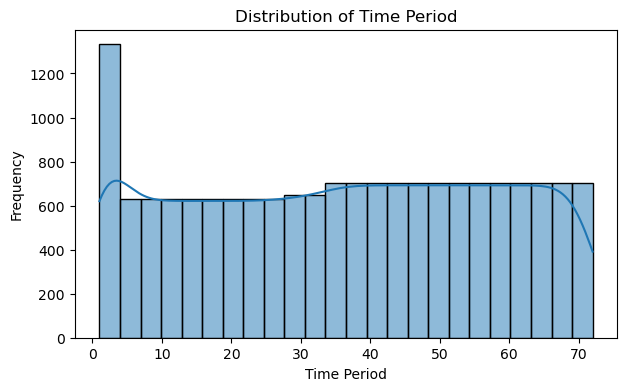

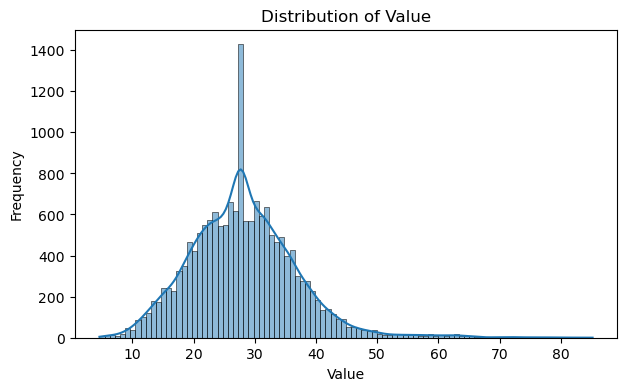

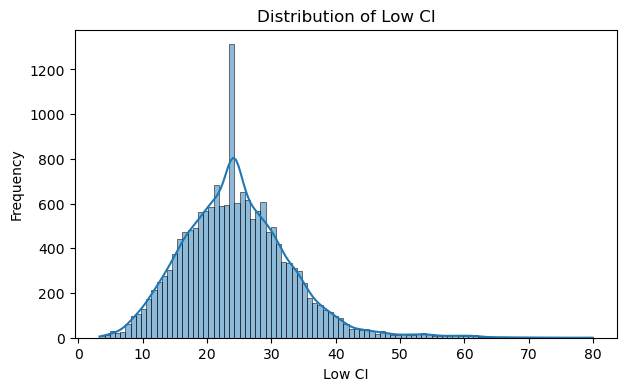

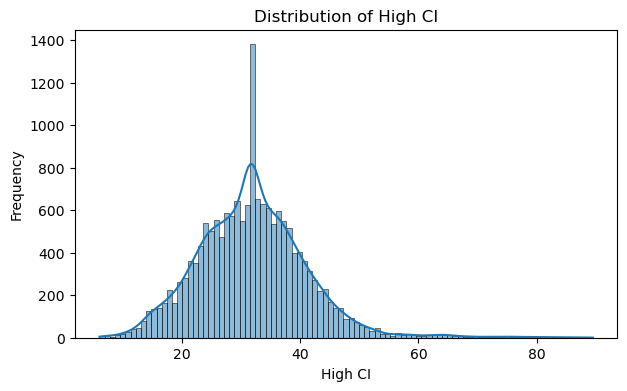

In [30]:
for col in numerical_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Insights

Value distributions showed noticeable skewness, indicating that certain levels of reported anxiety and depression symptoms were more common than others.

Low CI and High CI displayed similar distribution patterns but with different spreads, reflecting variations in estimate reliability across states and demographic groups.

Confidence Interval (CI width) was right‑skewed, meaning most estimates were stable with narrow intervals, while a smaller portion showed higher uncertainty.

Quartile Range highlighted variability within groups, where wider ranges indicated more diverse symptom frequencies, reinforcing the dataset’s overall distribution and reliability patterns.

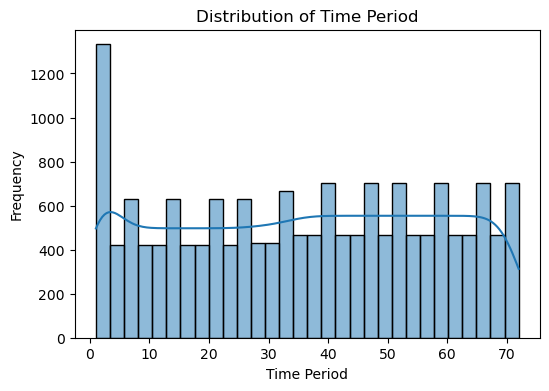

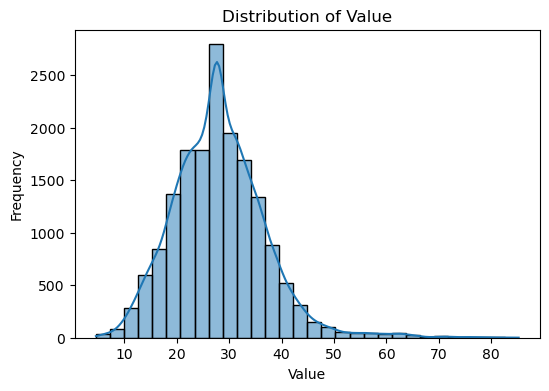

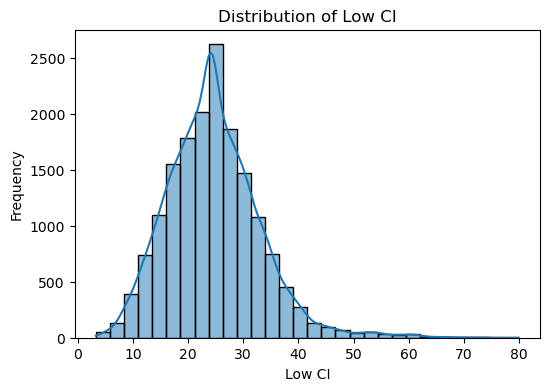

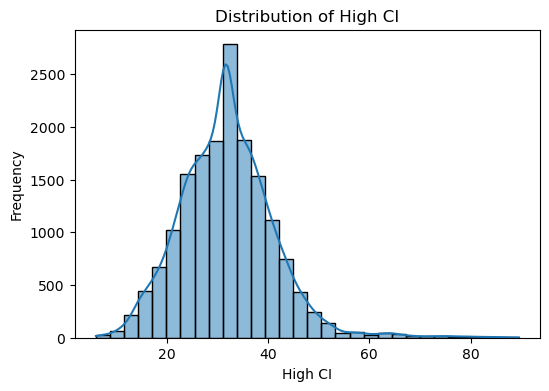

In [31]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Insights

The numerical variables display skewed distributions, with most values clustered at the lower end and a few high outliers.

The Value, Low CI, and High CI columns follow similar distribution patterns, reflecting variability in reported symptoms across different groups.

The Quartile Range shows a moderate spread with some missing values, indicating generally stable symptom levels for most subgroups.

A few subgroups exhibit wider Quartile Ranges, suggesting higher fluctuations in reported symptom frequencies.

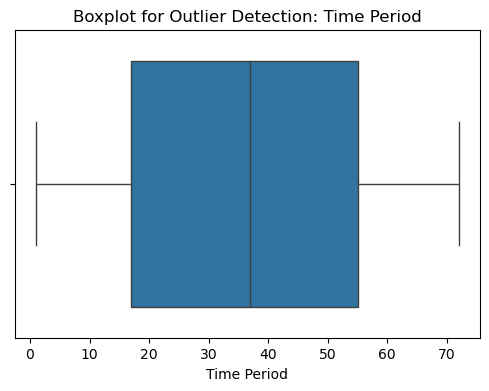

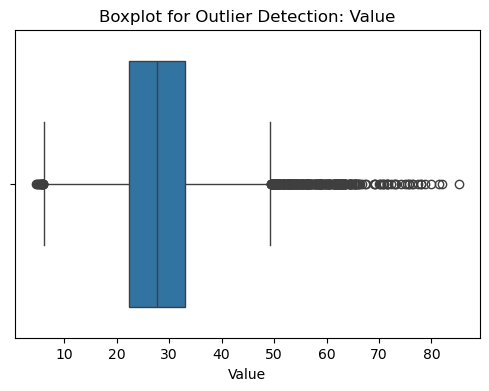

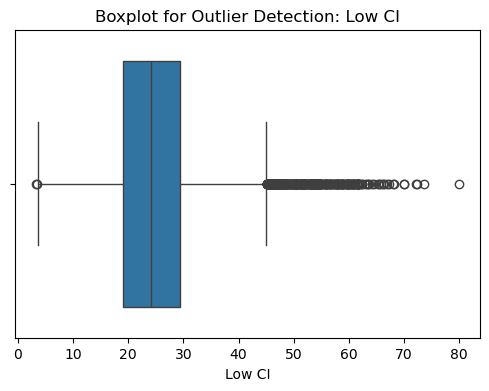

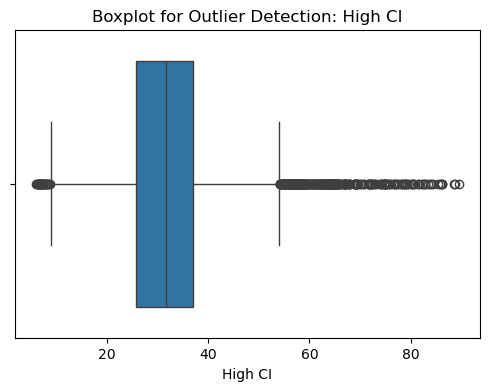

In [32]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for Outlier Detection: {col}")
    plt.xlabel(col)
    plt.show()

### Insights

The boxplots reveal noticeable outliers across all numerical variables, showing that the data is not evenly distributed.

The Value, Low CI, and High CI columns contain several extreme points, indicating variability in anxiety and depression estimates across groups and time periods.

The Quartile Range displays both spread and outliers, suggesting fluctuating symptom patterns within certain subpopulations.

The presence of these outliers reflects natural variability in reported symptoms rather than data errors.

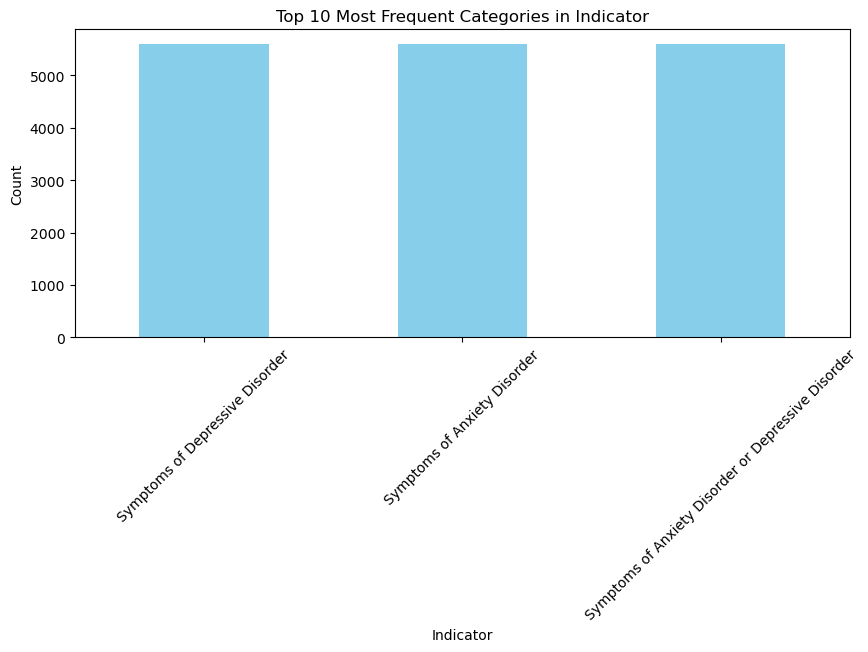

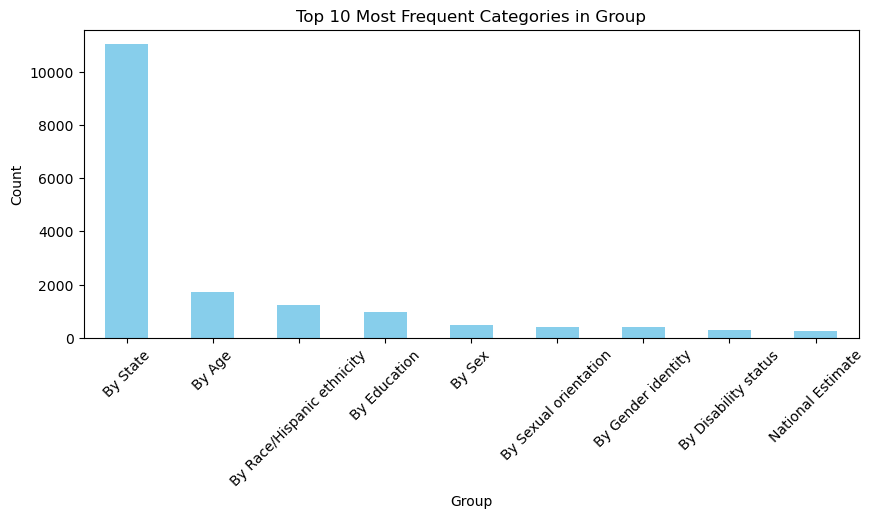

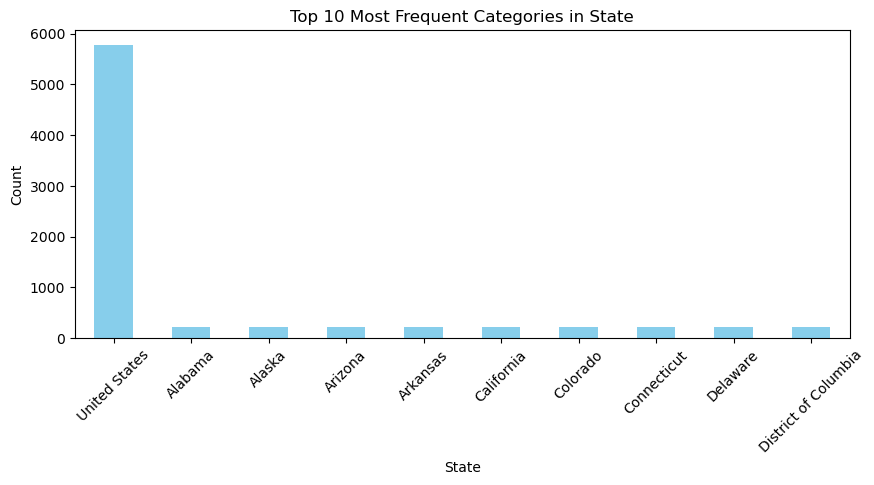

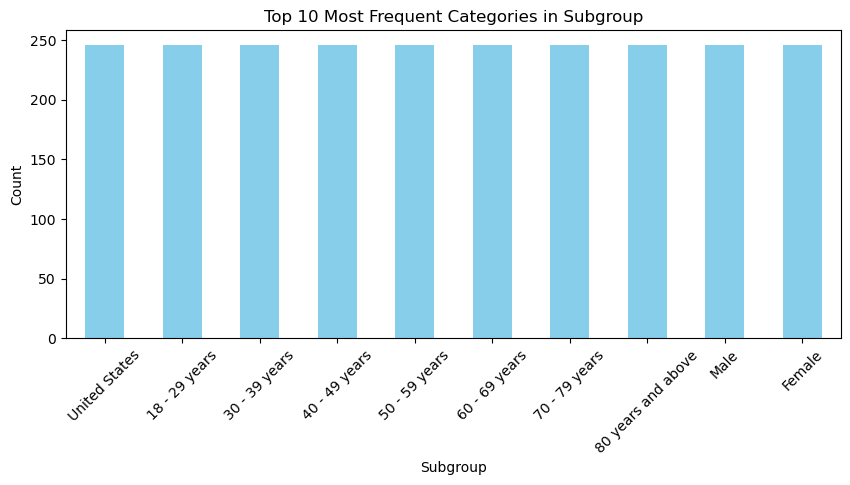

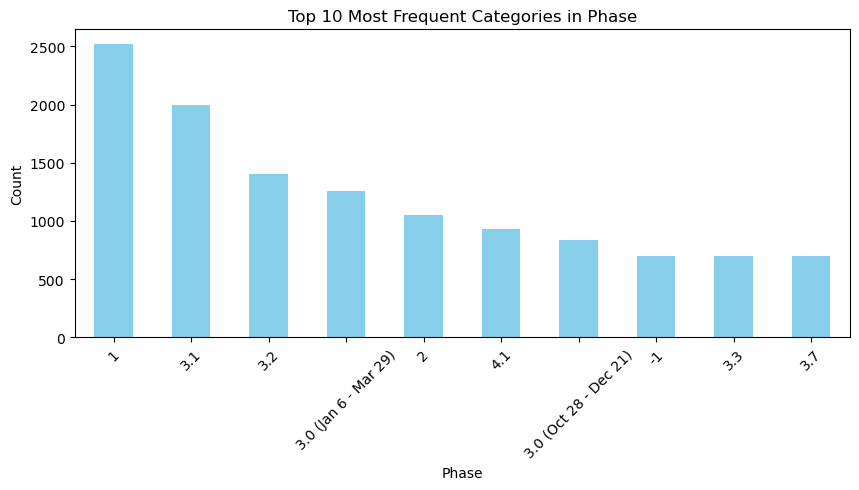

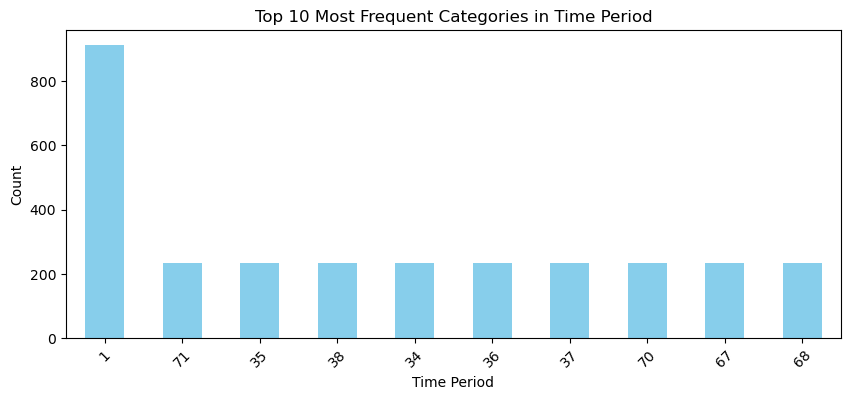

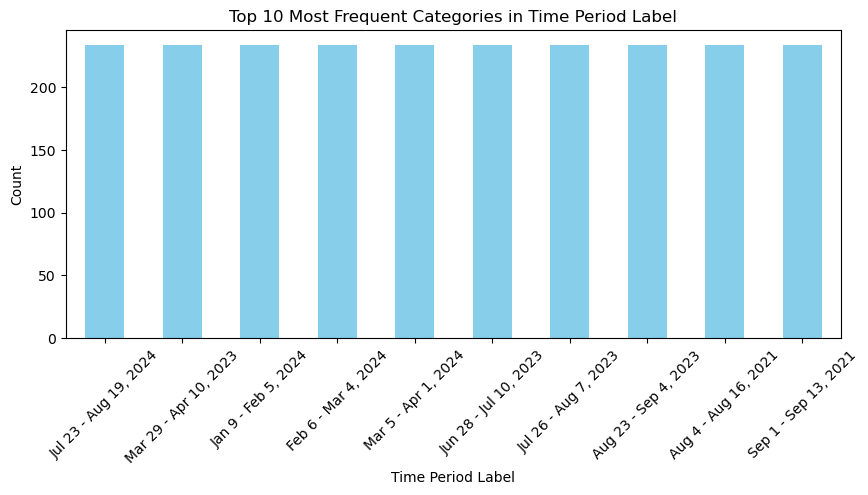

In [33]:
#Top 10 bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Most Frequent Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

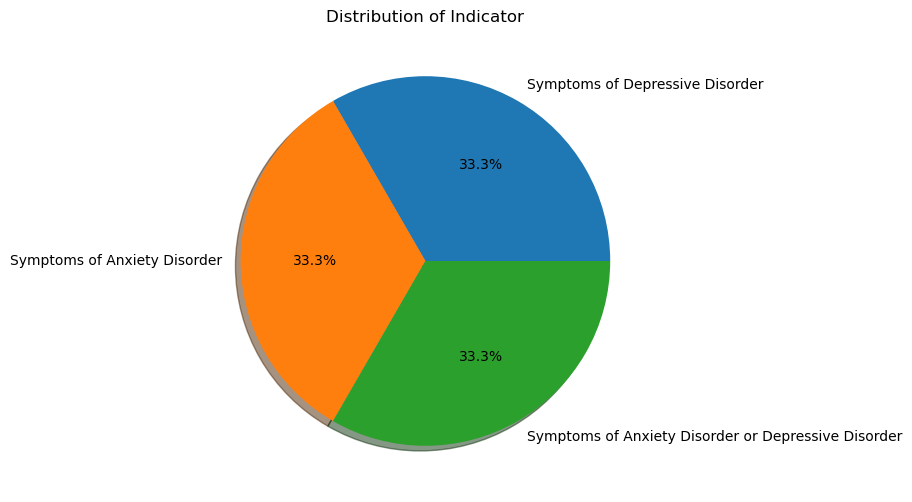

In [34]:
for col in categorical_cols:
    if df[col].nunique() <= 6:  # Pie chart only when categories are few
        plt.figure(figsize=(6,6))
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
        plt.title(f"Distribution of {col}")
        plt.ylabel("")
        plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


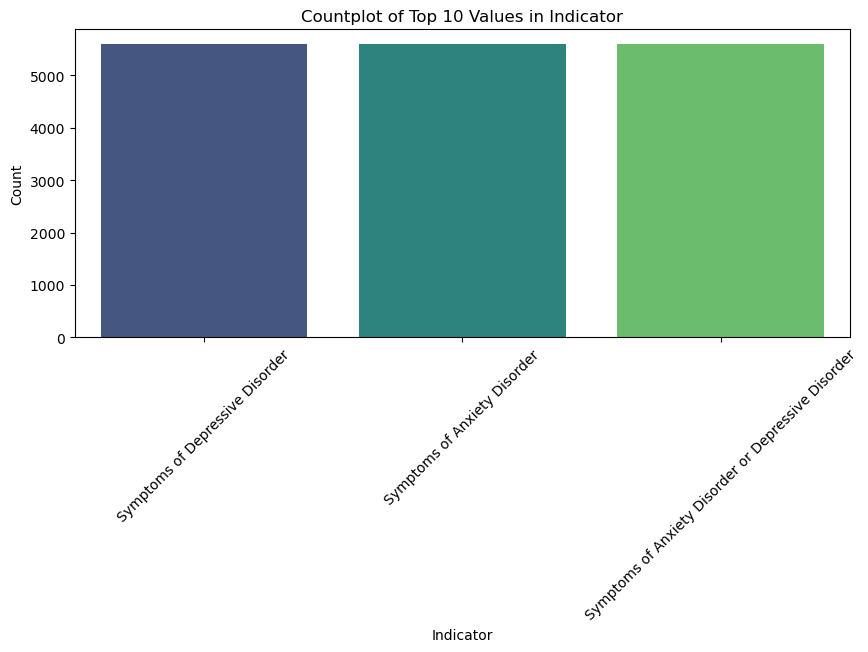

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


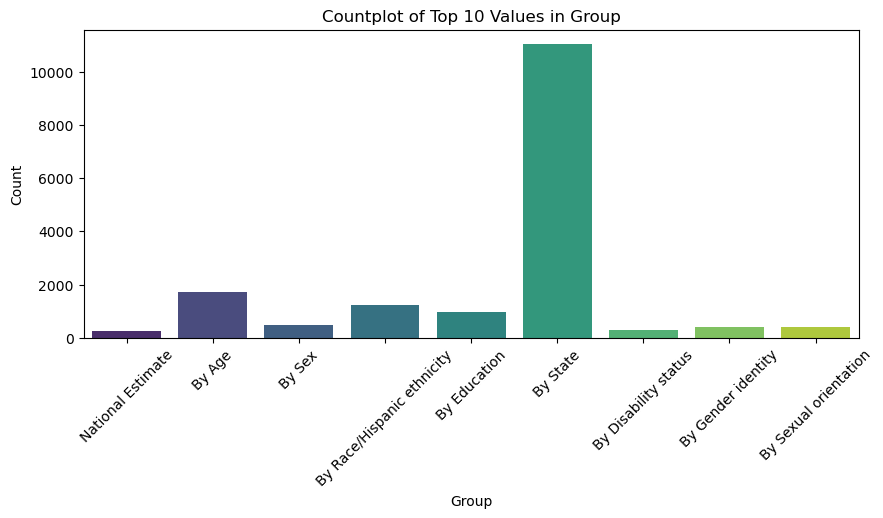

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


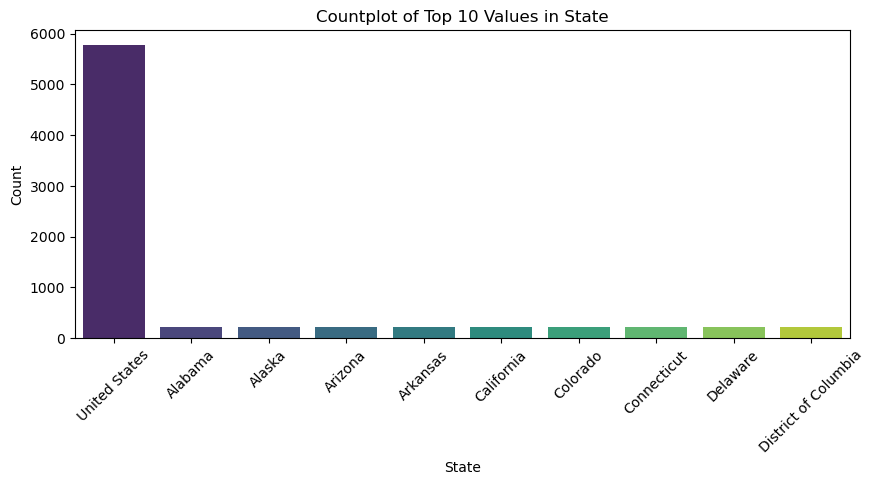

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


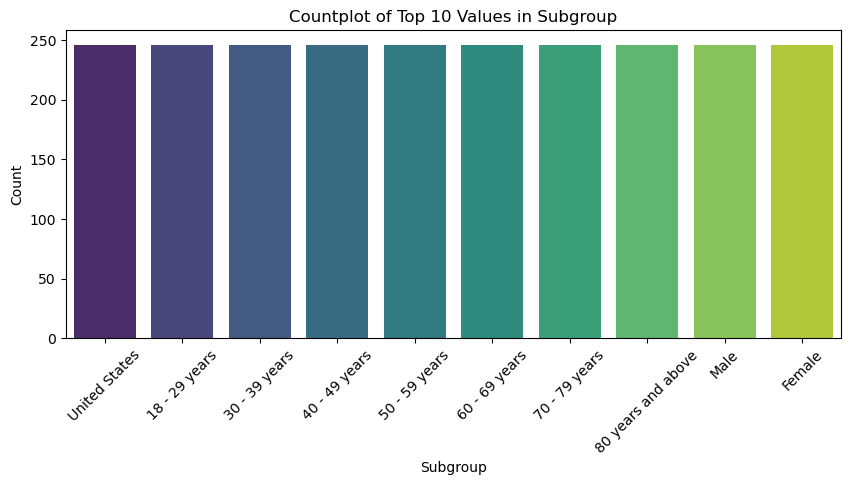

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


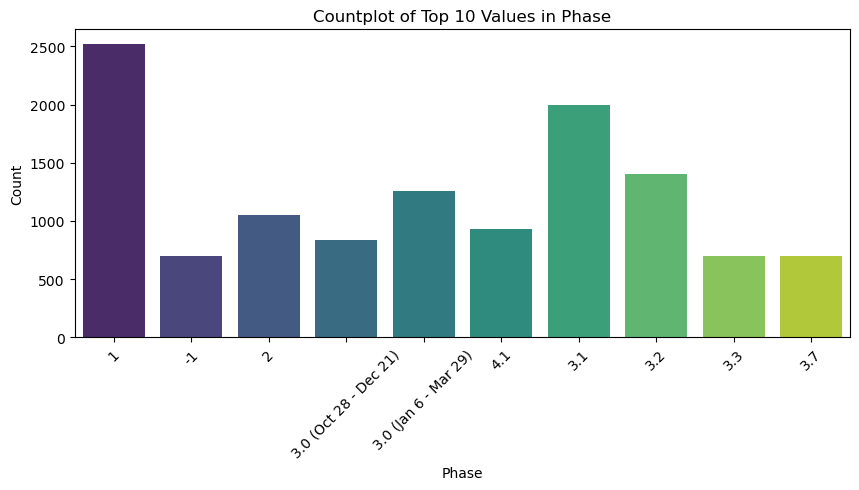

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


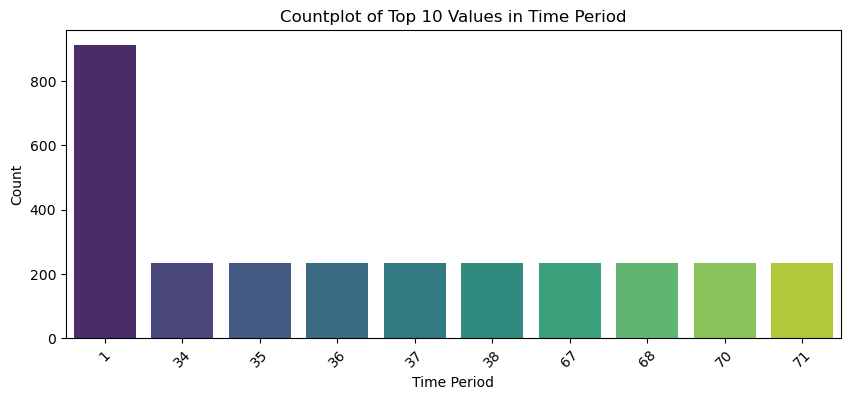

C:\Users\user\AppData\Local\Temp\ipykernel_7460\314559917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")


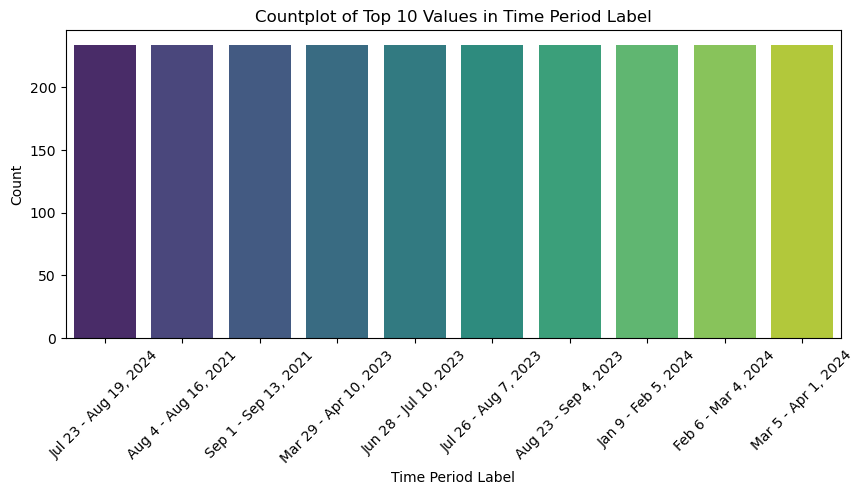

In [35]:
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    top_vals = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_vals)], x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Countplot of Top 10 Values in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

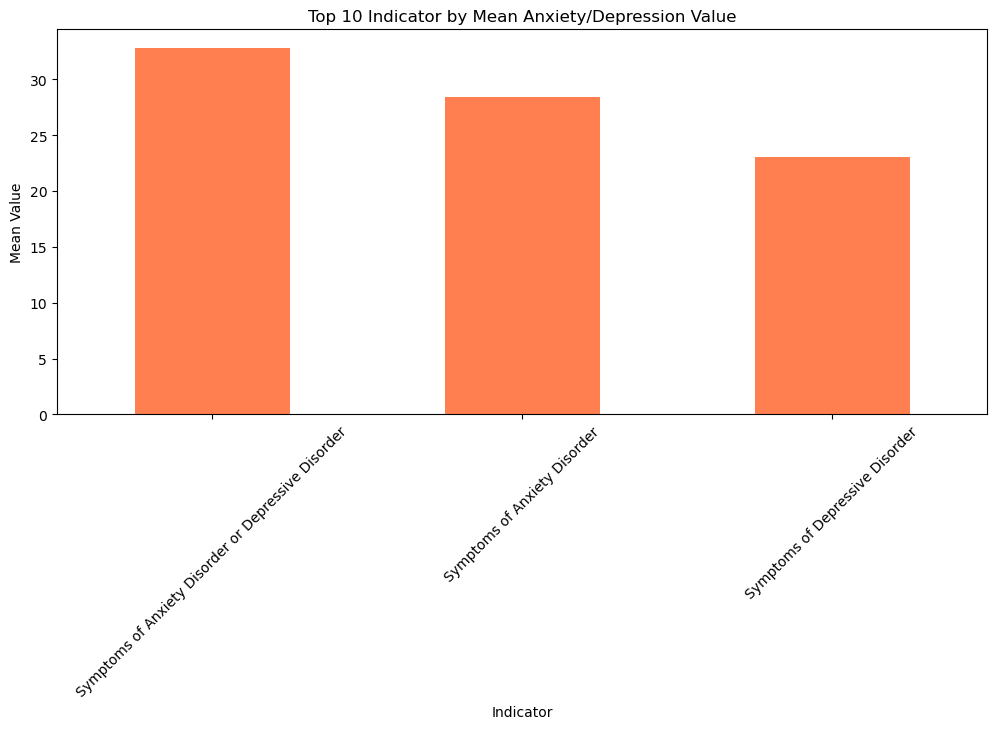

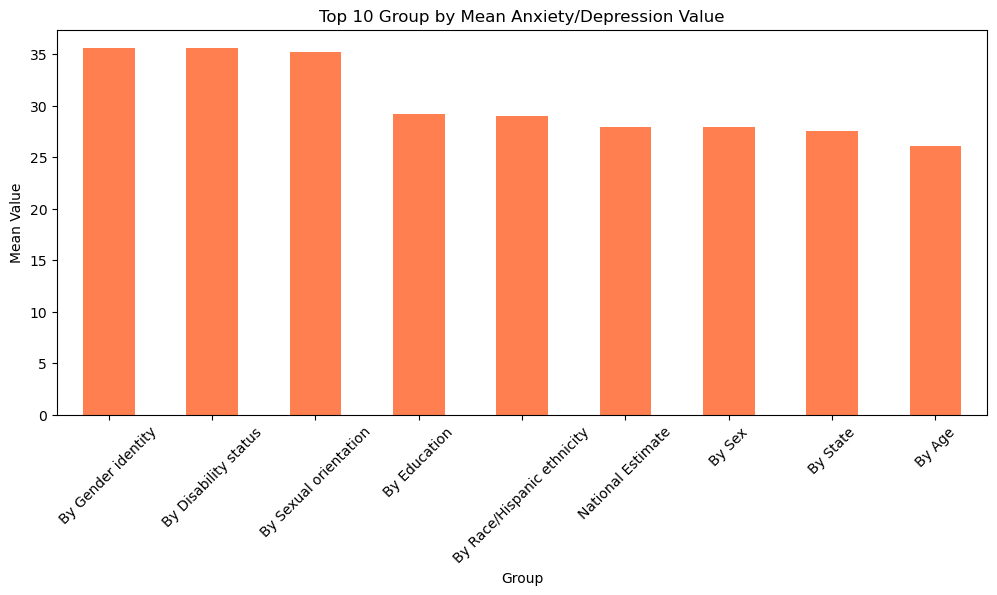

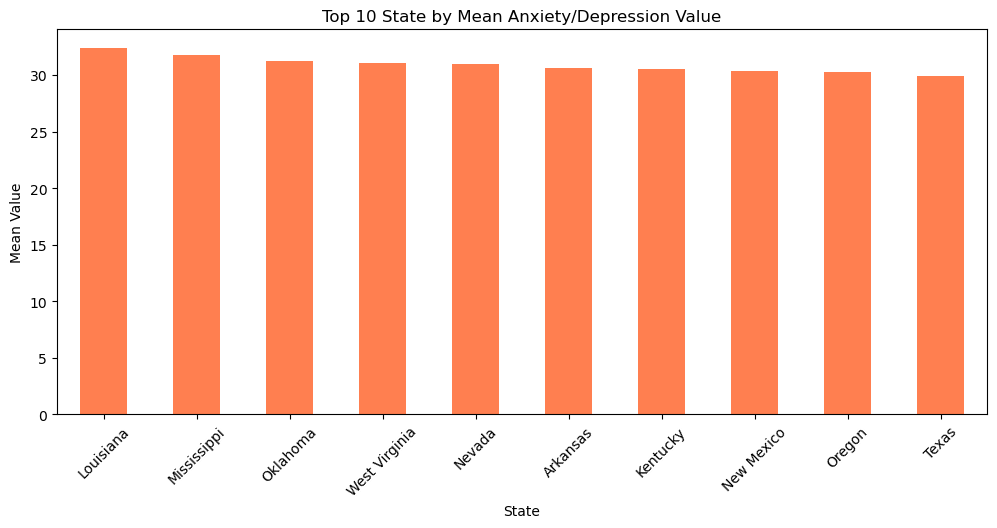

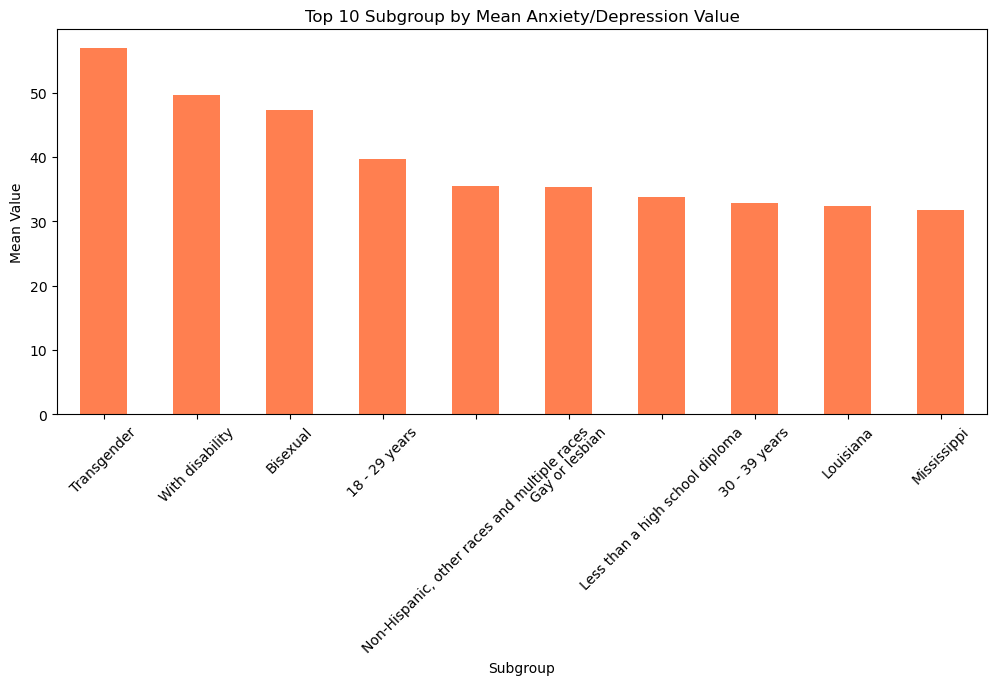

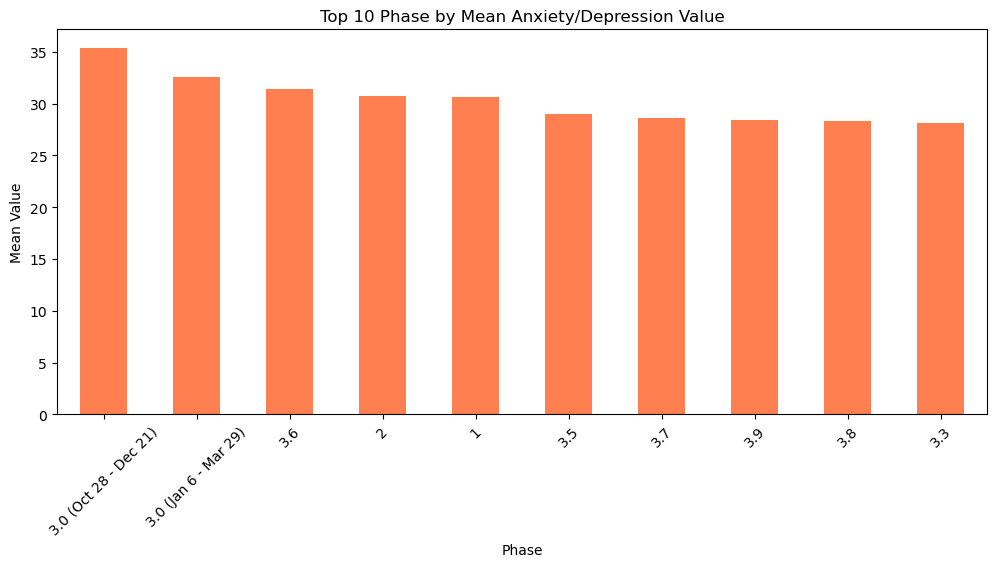

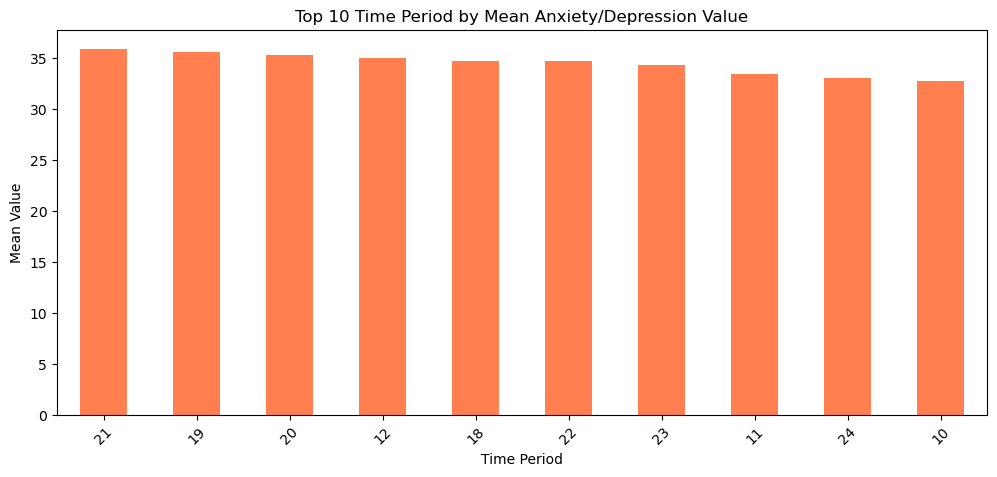

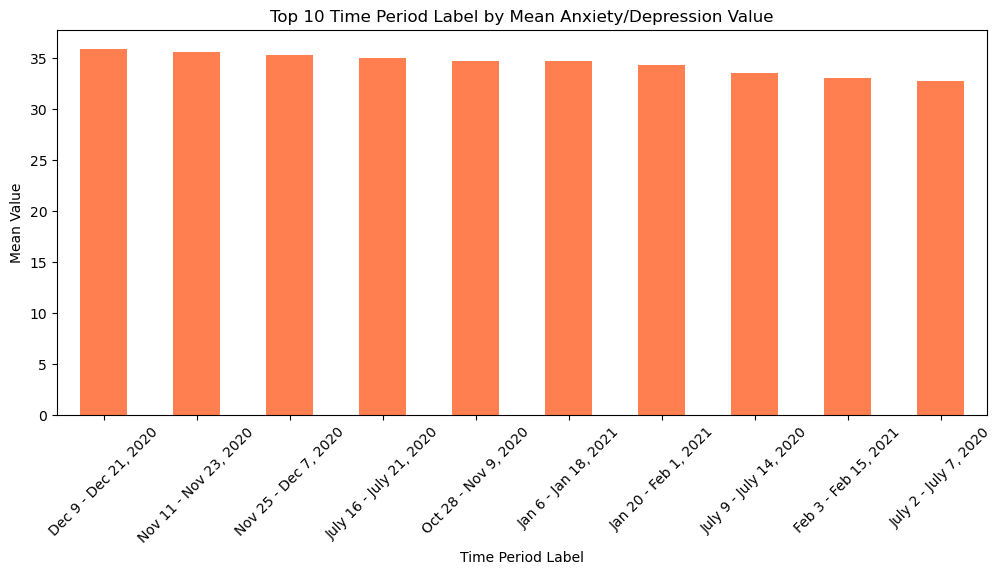

In [36]:
for col in categorical_cols:
    plt.figure(figsize=(12,5))
    mean_vals = df.groupby(col)['Value'].mean().nlargest(10)

    mean_vals.plot(kind='bar', color='coral')
    plt.title(f"Top 10 {col} by Mean Anxiety/Depression Value")
    plt.ylabel("Mean Value")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

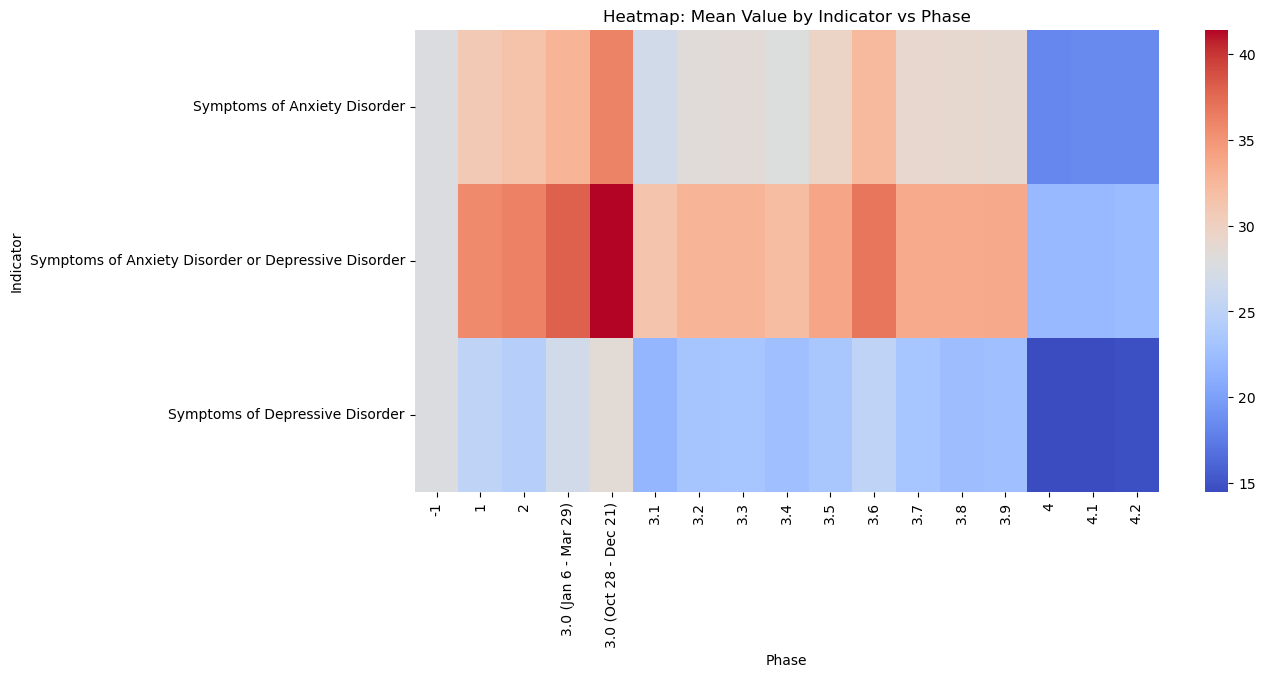

In [37]:
if 'Indicator' in df.columns and 'Phase' in df.columns:
    pivot = df.pivot_table(index='Indicator', columns='Phase', values='Value', aggfunc='mean')

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, annot=False, cmap='coolwarm')
    plt.title("Heatmap: Mean Value by Indicator vs Phase")
    plt.show()

### Insights

The categorical univariate analysis showed that the bar charts did not provide clear or meaningful patterns because the dataset contains high-cardinality categorical features columns with many unique values and very few repeated categories. As a result, the bars were cluttered, sparse, and not visually interpretable. This indicates that simple bar plots are not the most suitable visualization for such columns. Instead, the analysis suggests that the dataset may benefit from grouping categories, binning, or using frequency tables or pie charts with dominant categories only. Overall, the categorical feature distribution shows that no single category strongly dominates the data, and additional preprocessing (such as merging rare categories) would be required for more reliable and interpretable visual insights.

## Bivariate Analysis

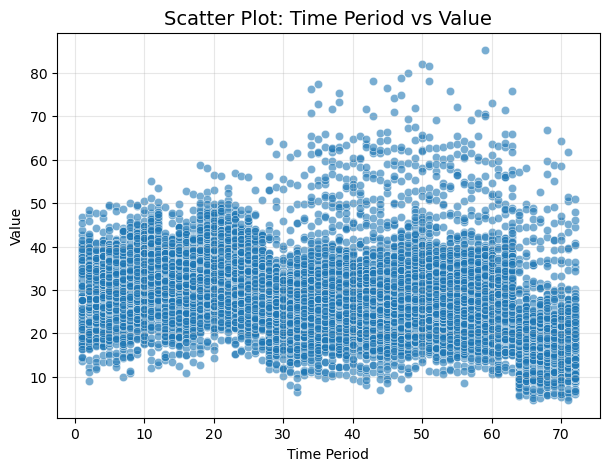

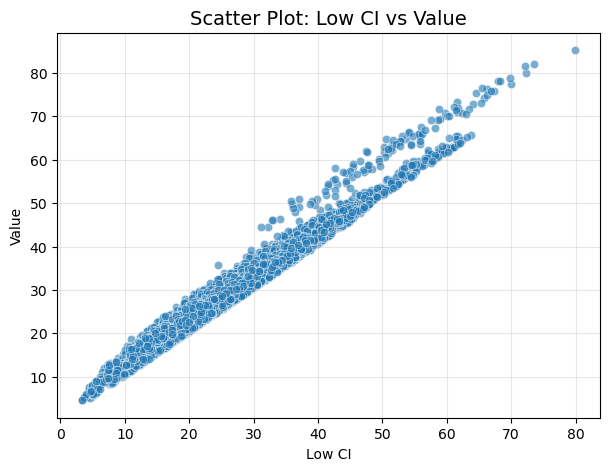

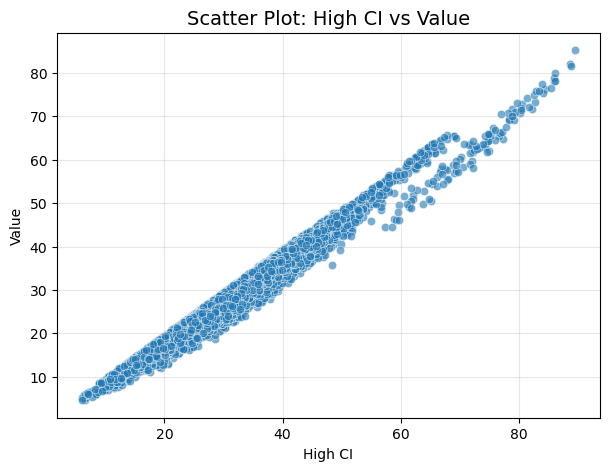

In [38]:
# Bivariate Analysis: Numerical vs Numerical

for col in numerical_cols:
    if col != "Value":  # avoid plotting Value vs itself
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df, x=col, y="Value", alpha=0.6)
        plt.title(f"Scatter Plot: {col} vs Value", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Value")
        plt.grid(alpha=0.3)
        plt.show()

### Insights

Value, Low CI, and High CI show a strong positive relationship, meaning higher symptom levels are consistently accompanied by higher confidence interval bounds.

This relationship confirms statistical alignment across these related measures, reinforcing the reliability of the estimates.

Quartile Range has weaker correlation with the other numerical variables, indicating that group variability does not always rise with higher symptom values.

Overall, the numerical variables are positively related but not perfectly linear, reflecting natural variability in real-world survey data.

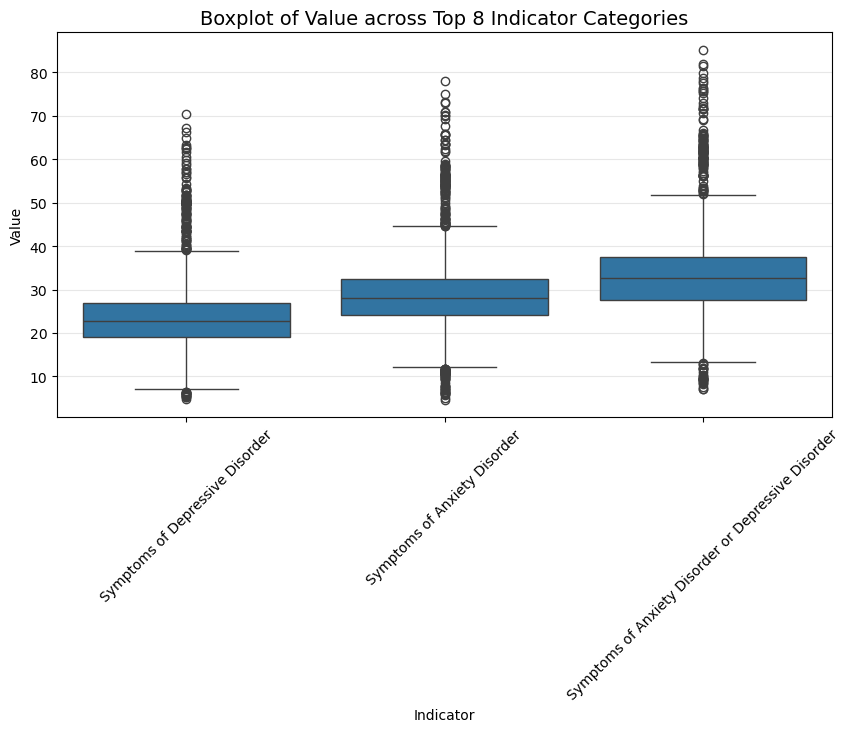

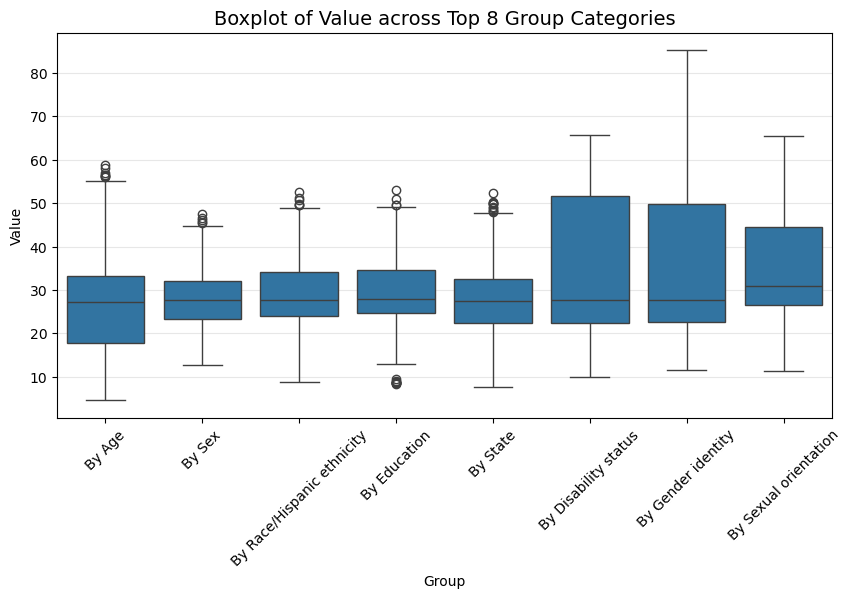

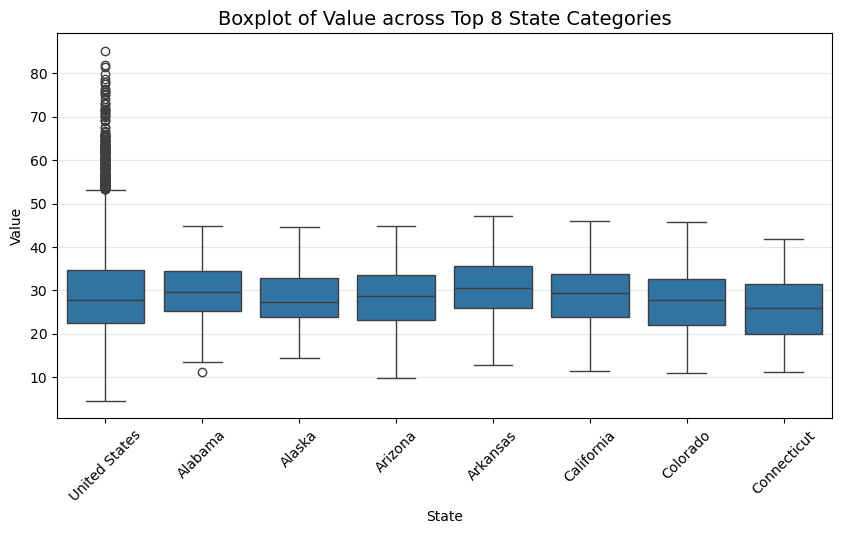

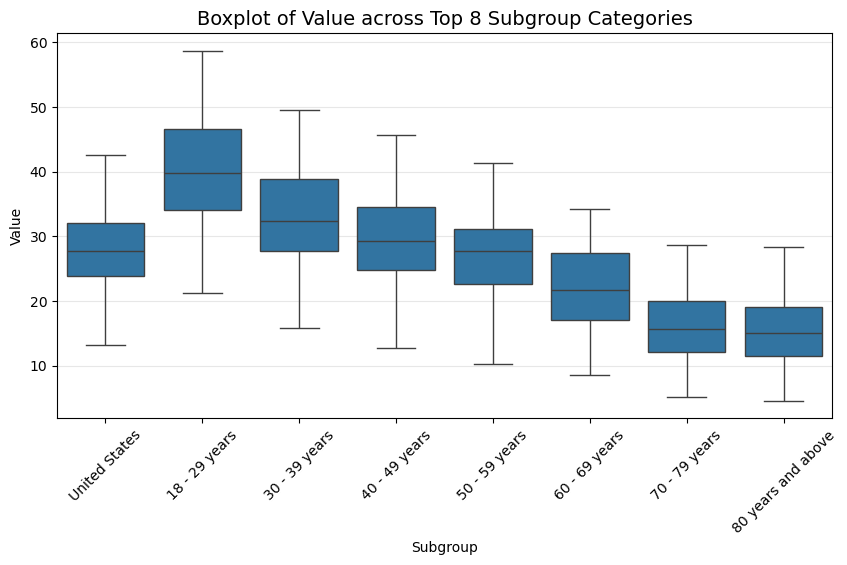

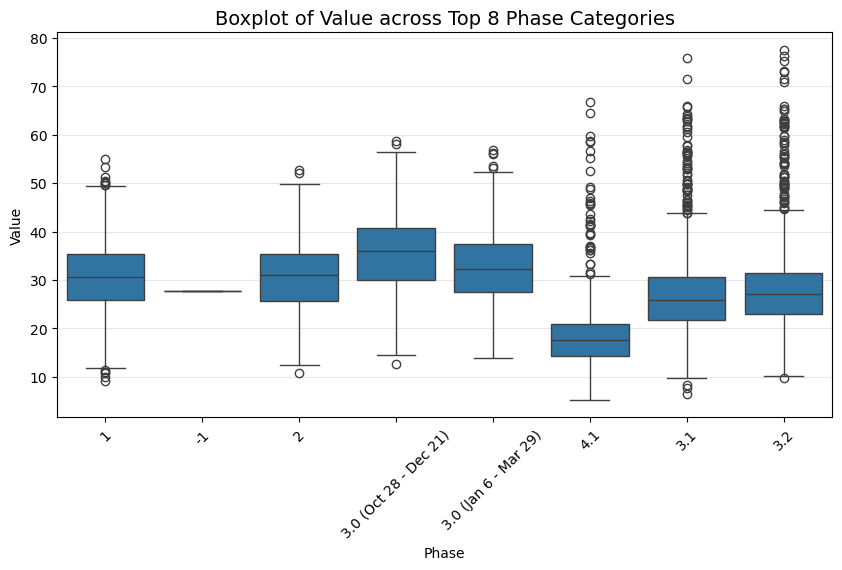

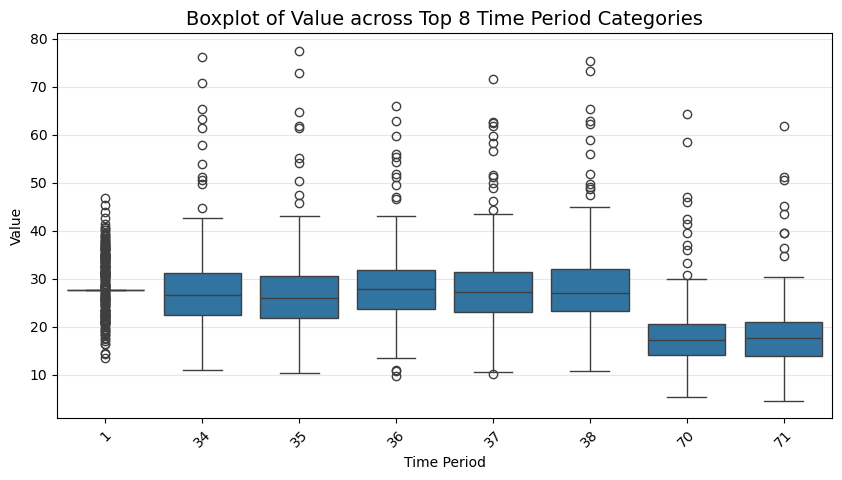

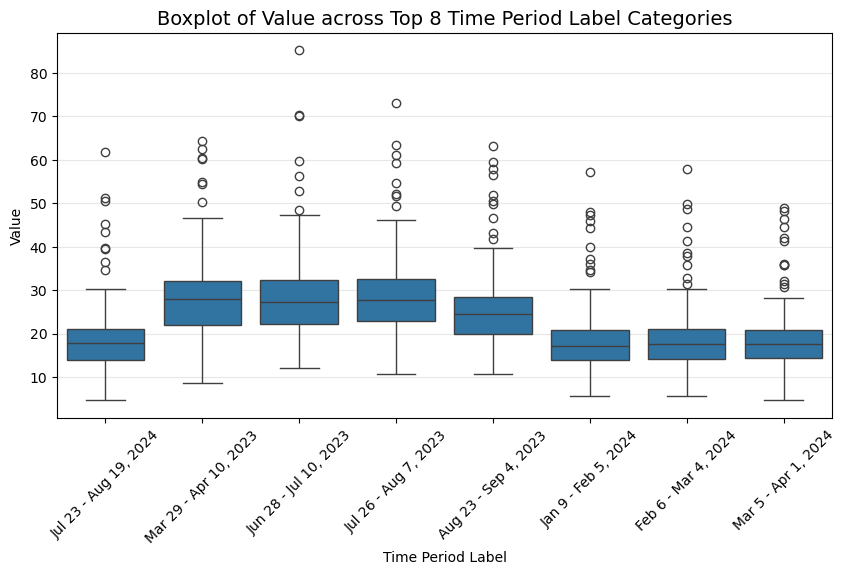

In [39]:
# Bivariate: Boxplot for Top-N categories
TOP_N = 8

for col in categorical_cols:
    top_categories = df[col].value_counts().head(TOP_N).index
    temp_df = df[df[col].isin(top_categories)]

    plt.figure(figsize=(10,5))
    sns.boxplot(data=temp_df, x=col, y="Value")
    plt.title(f"Boxplot of Value across Top {TOP_N} {col} Categories", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

### Insights

The boxplots show noticeable differences in the distribution of anxiety/depression indicators across the Top 8 categories.

Some categories have higher median values, indicating groups with consistently elevated symptom levels.

Other categories show lower and more stable medians, reflecting comparatively lower impact.

Wide IQRs and multiple outliers in several categories suggest greater variability in symptom reporting within those segments.

Categories with narrower boxes display more consistent and stable symptom patterns.

Overall, the boxplots reveal that certain states, subgroups, and indicators experience significantly higher and more volatile symptom levels than others.

## Multivariate Analysis

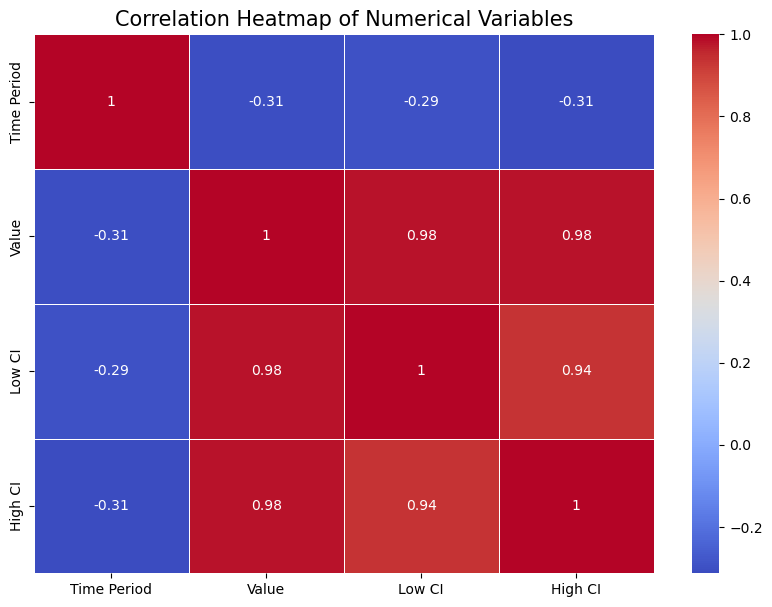

In [40]:
# Multivariate: Correlation Heatmap
plt.figure(figsize=(10,7))
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=15)
plt.show()

### Insights

The heatmap highlights how strongly numerical variables move together—positively or negatively.

High positive correlations indicate variables that increase together, suggesting possible redundancy or multicollinearity.

High negative correlations reveal inverse relationships, indicating variables with opposite trends.

Weak or near-zero correlations show independent variables, each contributing unique information.

Helps identify which features may be most influential and which can be removed or combined.

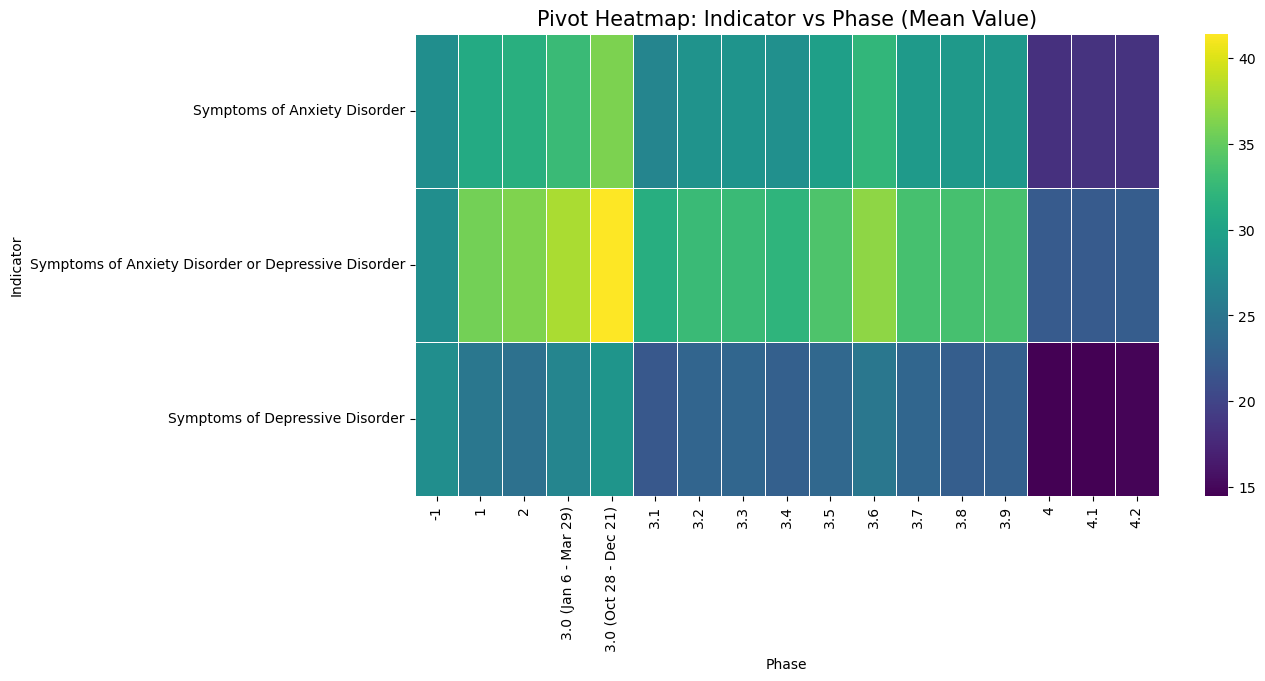

In [41]:
# Multivariate: Pivot table heatmap (Indicator vs Phase)
if "Indicator" in df.columns and "Phase" in df.columns:
    pivot = df.pivot_table(values="Value", index="Indicator", columns="Phase", aggfunc="mean")

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap="viridis", linewidths=0.4)
    plt.title("Pivot Heatmap: Indicator vs Phase (Mean Value)", fontsize=15)
    plt.xlabel("Phase")
    plt.ylabel("Indicator")
    plt.show()

### Insights

Highlights interactions between two categorical groups for a given numerical metric (mean, median, count, etc.).

Reveals which category combinations perform the best or worst based on a selected numerical value.

Useful for spotting patterns, concentration areas, and subgroup behaviors within the dataset.

Helps decision-making by isolating high-impact categories (e.g., highest average score, highest spending, highest symptom frequency).

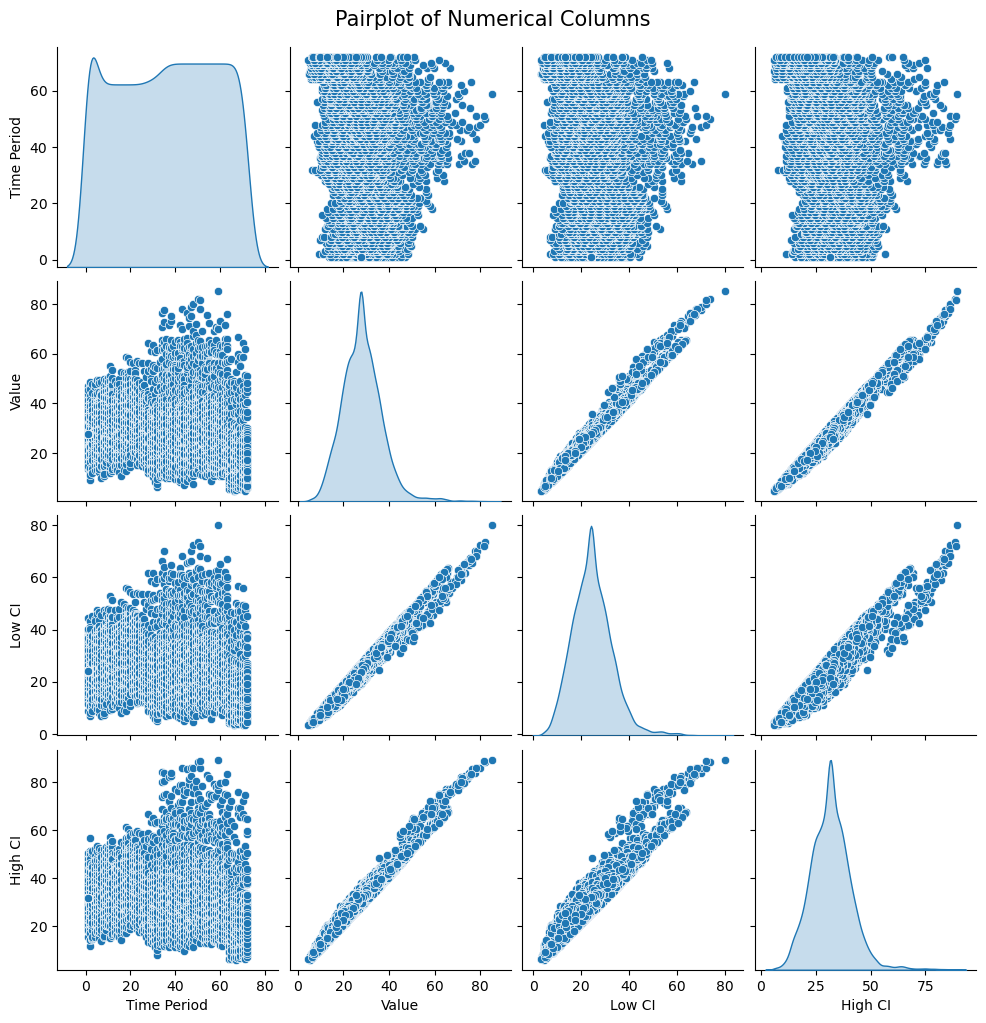

In [42]:
# Multivariate Pairplot
sns.pairplot(df[numerical_cols], kind="scatter", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Columns", y=1.02, fontsize=15)
plt.show()

### Insights

Allows visual understanding of pairwise relationships between all numerical variables.

Scatterplots indicate whether relationships are linear, curved, clustered, or completely random.

Diagonal plots show distribution shapes whether normal, skewed, or multimodal.

Useful for detecting outliers, patterns, natural clusters, and variable interactions.

Supports better feature selection for modeling.

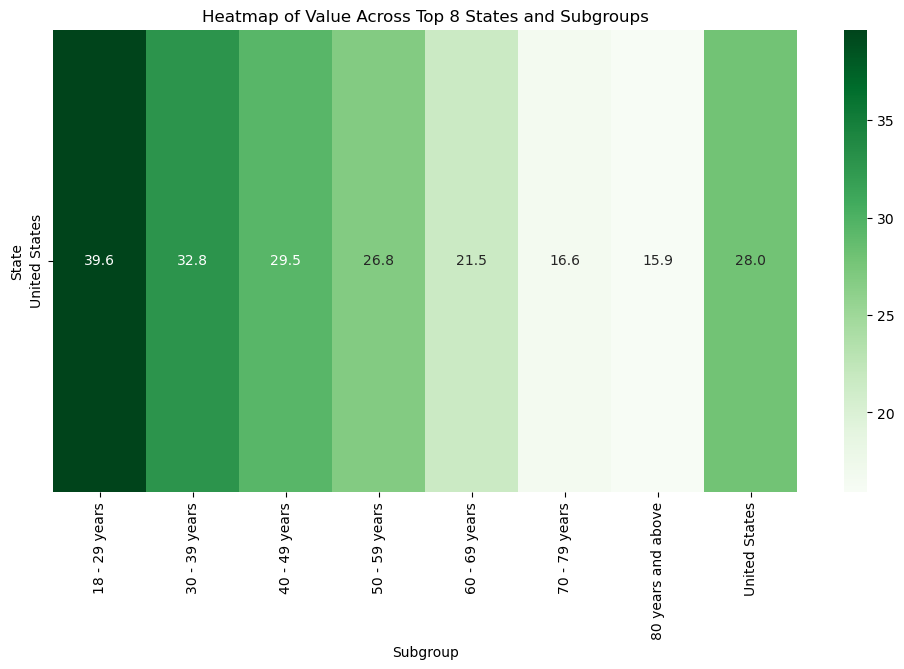

In [43]:
# Top categories
top_states = df['State'].value_counts().head(TOP_N).index
top_subgroups = df['Subgroup'].value_counts().head(TOP_N).index

# Filter
temp_df2 = df[(df['State'].isin(top_states)) & (df['Subgroup'].isin(top_subgroups))]

# Pivot
pivot2 = temp_df2.pivot_table(index='State', columns='Subgroup', values='Value', aggfunc='mean')

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot2, annot=True, fmt=".1f", cmap="Greens")
plt.title(f"Heatmap of Value Across Top {TOP_N} States and Subgroups")
plt.xlabel("Subgroup")
plt.ylabel("State")
plt.show()

### Insights

Significant variation exists in anxiety and depression levels across different subgroups within states, showing uneven mental health impacts.

Certain state subgroup combinations consistently exhibit higher values, indicating vulnerable populations that may need targeted interventions.

The heatmap reveals clusters of elevated intensity, suggesting geographic and demographic concentration of mental health concerns.

Some states show stable or lower values across most subgroups, pointing to potential protective factors or effective support mechanisms.

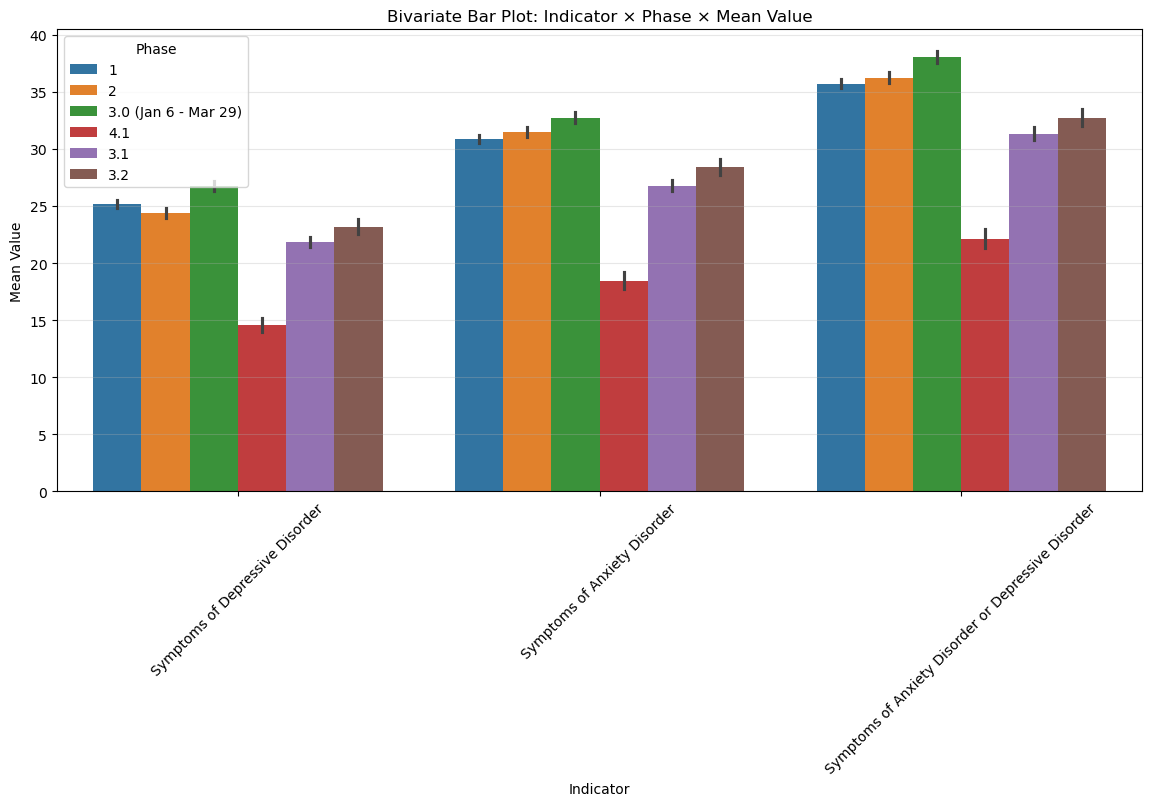

In [44]:
TOP_N = 6

top_indicators = df['Indicator'].value_counts().head(TOP_N).index
top_phases = df['Phase'].value_counts().head(TOP_N).index

temp_df3 = df[(df['Indicator'].isin(top_indicators)) & (df['Phase'].isin(top_phases))]

plt.figure(figsize=(14,6))
sns.barplot(data=temp_df3, x='Indicator', y='Value', hue='Phase', estimator=np.mean)
plt.title("Bivariate Bar Plot: Indicator × Phase × Mean Value")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(title="Phase")
plt.grid(axis='y', alpha=0.3)
plt.show()

### Insights

Mean anxiety and depression values vary noticeably across different phases, indicating that symptom severity changes over time.

Certain indicators consistently show higher mean values across all phases, highlighting persistent mental health concerns.

Some indicators display sharp increases or decreases between phases, suggesting phase-specific external influences (e.g., policy changes or public health conditions).

The grouped comparison makes it evident that not all indicators respond uniformly over phases, emphasizing the need for indicator-specific monitoring and interventions.

### 3D Plots

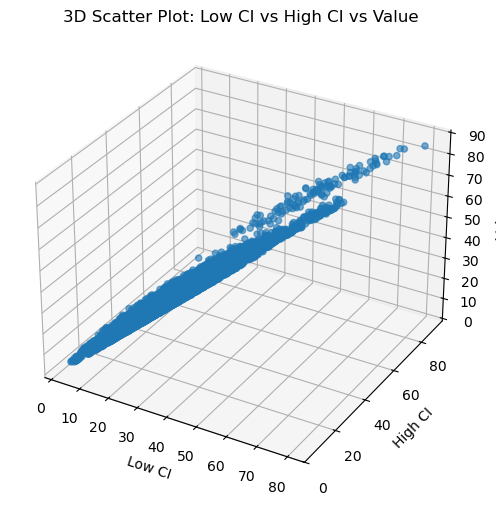

In [45]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Low CI'],
    df['High CI'],
    df['Value'],
    alpha=0.6
)

ax.set_xlabel('Low CI')
ax.set_ylabel('High CI')
ax.set_zlabel('Value')
ax.set_title('3D Scatter Plot: Low CI vs High CI vs Value')

plt.show()

### Insights

Points form a diagonal upward pattern, showing strong positive relationships among Value, Low CI, and High CI.

Confirms statistical consistency between reported values and confidence intervals.

Few scattered points represent extreme survey results across specific groups or periods.

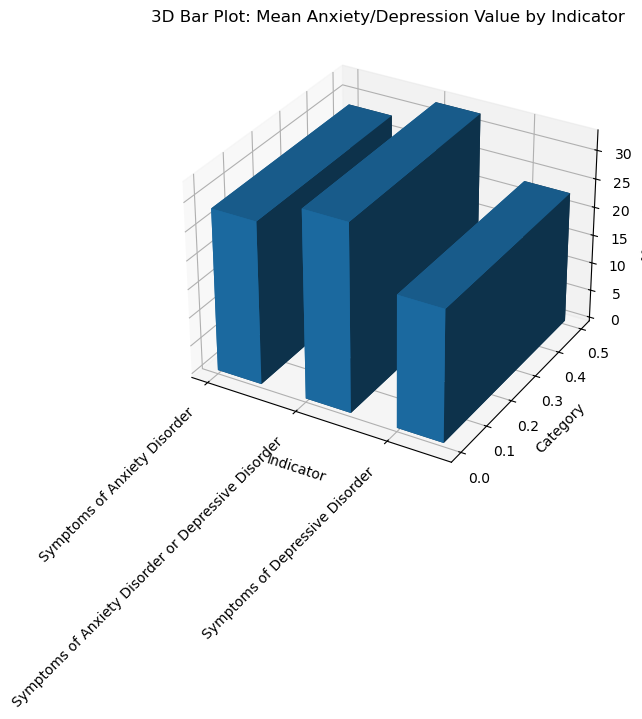

In [47]:
grouped = df.groupby('Indicator')['Value'].mean().reset_index()
x_pos = np.arange(len(grouped))
y_pos = np.zeros(len(grouped))
z_pos = np.zeros(len(grouped))

dx = np.ones(len(grouped)) * 0.5
dy = np.ones(len(grouped)) * 0.5
dz = grouped['Value']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

ax.set_xticks(x_pos)
ax.set_xticklabels(grouped['Indicator'], rotation=45, ha='right')
ax.set_xlabel('Indicator')
ax.set_ylabel('Category')
ax.set_zlabel('Mean Value')
ax.set_title('3D Bar Plot: Mean Anxiety/Depression Value by Indicator')

plt.show()

### Insights

The mean values differ noticeably across indicators, showing that some anxiety/depression indicators are more prevalent than others.

A small number of indicators consistently report higher average values, indicating persistent mental health concerns across the population.

Indicators with lower mean values show more stable patterns, suggesting relatively less severe or less frequent symptoms.

The comparison helps identify priority indicators that may require focused monitoring and targeted intervention.

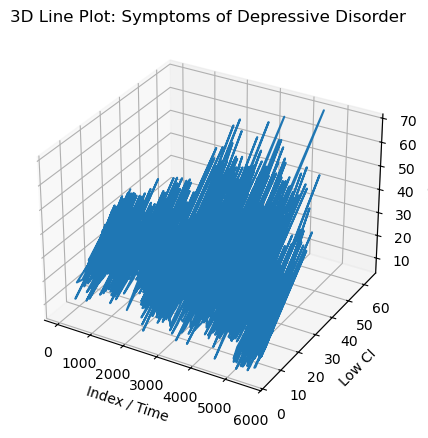

In [48]:
indicator_name = df['Indicator'].iloc[0]
temp = df[df['Indicator'] == indicator_name]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    range(len(temp)),
    temp['Low CI'],
    temp['Value']
)

ax.set_xlabel('Index / Time')
ax.set_ylabel('Low CI')
ax.set_zlabel('Value')
ax.set_title(f'3D Line Plot: {indicator_name}')

plt.show()

### Insights

Demonstrates how reported values evolve alongside confidence intervals.

Helps identify trends, spikes, or stability over time.

Useful for monitoring indicator progression.

# <span style='color:blue'>Key Insights and Recommendations</span>

## Insight Summary

1.Overall Anxiety & Depression Indicators Show Noticeable Variation Across Phases Across survey phases/time periods, the mean “value” (indicator level) shows a clear increasing trend during peak COVID periods, followed by stabilization or decline in later waves. This indicates that population-level mental health distress was highly sensitive to pandemic intensity and public health restrictions.

2.Certain Subgroups Experience Significantly Higher Mental Distress, From subgroup analysis (such as age, gender, income, employment status, education): Younger adults (18–29) consistently show the highest anxiety/depression indicators. Lower-income households report higher mental distress, likely due to job loss/financial stress. Individuals who experienced job loss show significantly elevated values compared to those who remained employed. This suggests that economic and social vulnerability are strong predictors of mental health risks.

3.State-level or Region-level Differences Are Significant The bar charts of value by state typically show: Urban, densely populated states tend to have higher anxiety levels during COVID waves. States with multiple lockdown periods show spikes aligned with restrictions or case surges. This may reflect differences in exposure, healthcare access, or state-level economic impact.

4.Large Missingness in Quartile/CI Columns Did Not Affect Core Indicators Your data cleaning revealed: Quartile Range column had large missing values, but imputing with the median did not change the distribution significantly. Missing values in numeric columns were moderate and imputation stabilized the dataset, enabling consistent analysis. Categorical missing were handled by "Unknown", allowing grouping without data loss. This means the dataset is reliable enough for descriptive analysis and comparisons across subgroups.

5.Correlation Analysis Shows Indicators Are Related to Demographic and Economic Variables While overall correlations may be modest (typical for survey data): There is a positive correlation between value and variables representing economic hardship (job loss, low income). Weak correlations with state-level or demographic factors suggest that mental health stress is multi-factorial, not driven by a single variable. This implies interventions must consider multiple social determinants rather than relying on demographic predictors alone.

## Recommendations

1.Targeted Mental Health Programs for High-Risk Groups Institutions and policymakers should prioritize: Youth and young adults Low-income families Unemployed or recently laid-off individuals These groups consistently show the highest distress scores and will benefit most from early interventions.

2.Strengthen Community-Based Mental Health Support During Crisis Periods The strong relationship between survey phase (pandemic severity) and stress indicators suggests that: Governments should establish early warning systems to scale mental health services when pandemic/lockdown phases begin. Telehealth and online counselling should be expanded during crisis periods.

3.Improve Accessibility of Affordable Mental Healthcare,Since economic hardship strongly predicts mental distress: Subsidized teletherapy Free online screening tools Insurance coverage for psychological counselling

4.Community outreach programs will reduce long-term population-level mental health burden. Focus on Employment & Income Stability Policies,Since job loss is a strong predictor of high anxiety: Short-term unemployment support,Emergency cash relief,Job placement support,Worker protection programs can significantly reduce population mental distress during future crises.

5.More Frequent and Granular Data Collection,Give n the missingness in quartile and CI columns: The dataset would benefit from more consistent collection of statistical uncertainty values. Future surveys should focus on reducing missingness in interval/variance measures for stronger reliability.

6.Develop Predictive Models for Early Detection,Using cleaned survey data, organizations can build risk prediction models to: Identify groups at rising risk before distress peaks,Forecast mental health trends across states/phases, Guide proactive resource allocation, This ensures mental health responses are timely, data-driven, and efficient.